In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
data5=pd.read_csv('C:\\Users\\Rohith varma\\Downloads\\archive (5)\\udemy_courses.csv',parse_dates=['published_timestamp'])

In [3]:
data5.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [4]:
print("Any missing value?",data5.isnull().values.any())

Any missing value? False


In [5]:
#Check for duplicate data and drop them 
data5.duplicated().any()

True

In [6]:
data5=data5.drop_duplicates()

In [7]:
data5.duplicated().any()

False

In [8]:
#find no of courses per subjects

In [9]:
data5['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

C:\Users\Rohith varma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


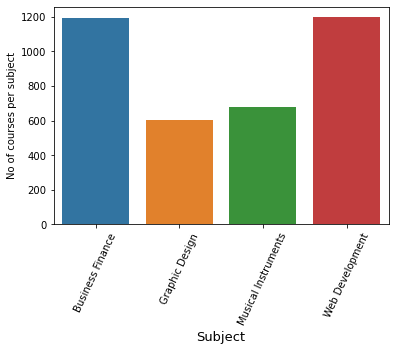

In [10]:
import matplotlib.pyplot as plt
sns.countplot(data5['subject']) 
plt.xlabel("Subject",fontsize=13) 
plt.ylabel("No of courses per subject") 
plt.xticks(rotation=65) 
plt.show()

In [11]:
#for which levels udemy provide the courses 
data5['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

C:\Users\Rohith varma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='level', ylabel='count'>

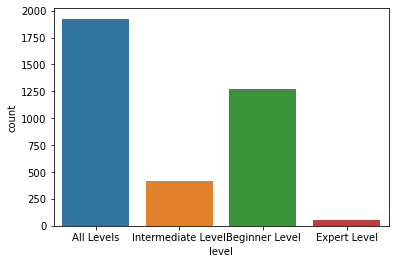

In [12]:
sns.countplot(data5['level'])

In [13]:
#display the count of free and paid courses 
data5['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

C:\Users\Rohith varma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_paid', ylabel='count'>

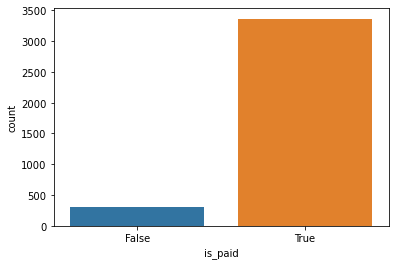

In [14]:
sns.countplot(data5['is_paid'])

In [15]:
data5.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [16]:
#which course has more lectures free or paid
data5.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


In [17]:
#which courses have a higher no of subsribers (free or paid)

In [18]:
data5.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

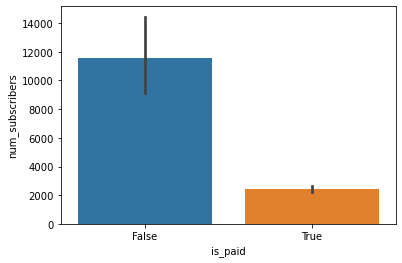

In [19]:
sns.barplot(x="is_paid",y="num_subscribers",data=data5)

<AxesSubplot:xlabel='level', ylabel='num_subscribers'>

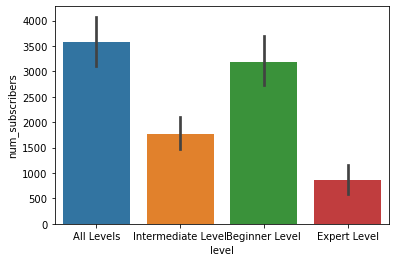

In [20]:
#which level have higher no of subscribers
sns.barplot(x="level",y="num_subscribers",data=data5)

In [21]:
#Find most popular course title 
data5[data5['num_subscribers'].max()==data5['num_subscribers']]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


In [22]:
#display 10 most popular courses as per no of subscribers 
top_10=data5.sort_values(by="num_subscribers",ascending=False).head(10)

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

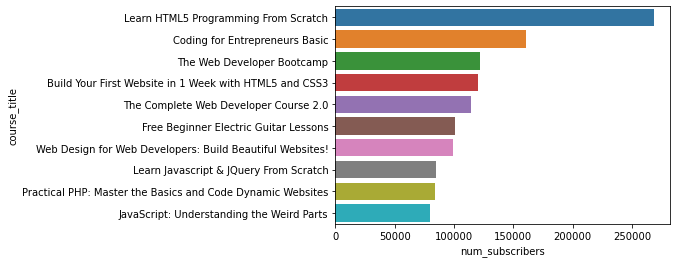

In [23]:
sns.barplot(x="num_subscribers",y="course_title",data=top_10)

In [24]:
#find the course which is having the highest no of reviews 
data5[data5['num_reviews'].max()==data5['num_reviews']]


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development


<AxesSubplot:xlabel='subject', ylabel='num_reviews'>

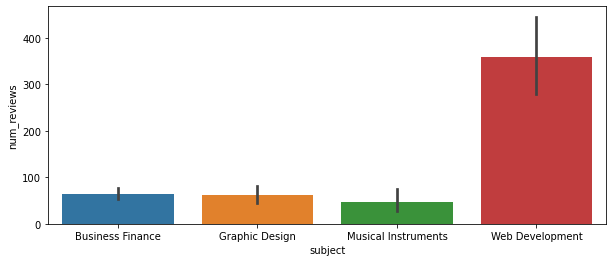

In [25]:
##### to visualize it the above  
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

sns.barplot(x="subject",y='num_reviews',data=data5)

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

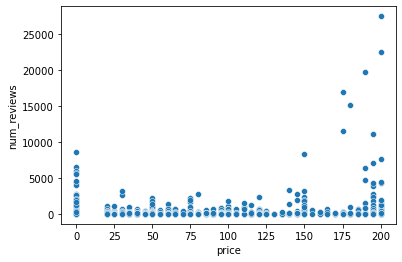

In [26]:
#does price effect no of reviews 
#we use scatter plot for it 
sns.scatterplot(x="price",y="num_reviews",data=data5)

In [27]:
#find total no of courses related to python

len(data5[data5['course_title'].str.contains('python',case=False)])

29

In [28]:
#display 10 most popular python courses as per no of subscribers  
python=data5[data5['course_title'].str.contains('python',case=False)].sort_values(by="num_subscribers",ascending=False).head(10)

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

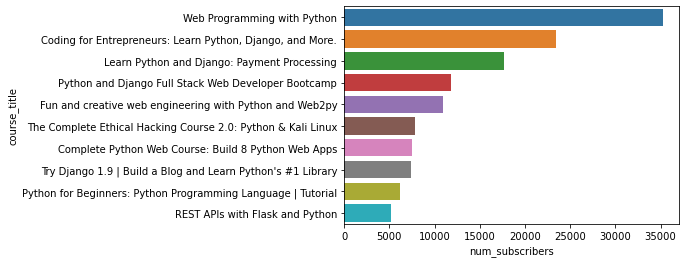

In [29]:
sns.barplot(x="num_subscribers",y="course_title",data=python)

In [30]:
###
#In which year the highest number of courses were posted
data5['Year']=data5['published_timestamp'].dt.year

In [31]:
data5.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


C:\Users\Rohith varma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

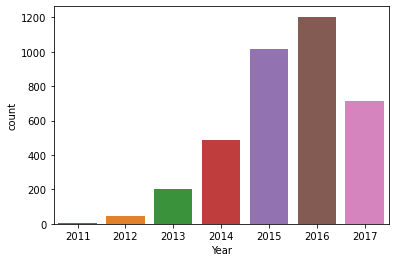

In [32]:
sns.countplot('Year',data=data5)

In [33]:
#display category wise count of posted subjects[year-wise] 
data5.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64